## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print(f'Data consists of {df.shape[0]} rows')

Data consists of 294478 rows


c. The number of unique users in the dataset.

In [4]:
print(f'The Data has {df.user_id.nunique()} Unique users ')

The Data has 290584 Unique users 


d. The proportion of users converted.

In [5]:
users_converted = (df[df.converted == 1].user_id.nunique() / df.user_id.nunique()) * 100
print(f'The proportion of users who converted is {users_converted}')

The proportion of users who converted is 12.104245244060237


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# Compute the specified query 
matches = df[((df.group == 'treatment') == (df.landing_page == 'new_page')) == False]
print(f' The number of times the `new_page` and `treatment` did not match is {matches.shape[0]}')
df.groupby([df.group.name, df.landing_page]).count()

 The number of times the `new_page` and `treatment` did not match is 3893


user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

f. Do any of the rows have missing values?

In [7]:
nulls = sum([df[i].isnull().sum() for i in df.columns])
print(f'The data have {nulls} nulls')

The data have 0 nulls


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Get the indices od the mismatches
idxs = matches.index
df2 = df.drop(index=idxs)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# The Data`s shape
df2.shape

(290585, 5)

In [11]:
print(f'Unique Users in the Data: {df2.user_id.nunique()}')

Unique Users in the Data: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# Get the index of the repeated id 
rptd_id = df2[df2.user_id.duplicated()].user_id.values[0]
rptd_id

773192

c. What is the row information for the repeat **user_id**? 

In [13]:
# Find the repeated id from df2
df2[df2.user_id == rptd_id]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# Remove Duplicated row
df2.drop_duplicates(subset='user_id', inplace=True)

In [15]:
# Check for duplicates
df2.user_id.duplicated().all() == False

True

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
# Compute the conversion prob.
p_conv = df2.converted.mean()
p_conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
# Get proportion of control group 
df2_control = df2[df2.group == 'control']

# Compute the prob. 
p_conv_control = df2_control.converted.mean()

print(f'p(conv|control) = {p_conv_control}')

p(conv|control) = 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
# Get proportion of treatment group
df2_treatment = df2[df2.group == 'treatment']

p_conv_treat = df2_treatment.converted.mean()
print(f'p(conv|treatment) = {p_conv_treat}')

p(conv|treatment) = 0.11880806551510564


d. What is the probability that an individual received the new page?

In [19]:
p_newPage = (df2.landing_page == 'new_page').mean()
print(f"p(new_page) = {p_newPage}")

p(new_page) = 0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

    There are no sufficient evidence, even though the conversion rate in (a) is very small, the conditional probalities indicates that both groups have close rates of conversion which is not enough to conclude that the new page has a better conversion rate. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

###### H0 : **$p_{new} - p_{old}$**  <= 0
###### H1 :  **$p_{new} - p_{old}$**  > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
# Get conversion prob. under null hyp.
p_new = df2.converted.mean()

In [21]:
print(f'Conversion rate under the null is {p_new}')

Conversion rate under the null is 0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
# Get conversion prob.under null hyp.
p_old = df2.converted.mean()
print(f'Conversion rate underl null is {p_old}')

Conversion rate underl null is 0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
# Get treatment group proportion
n_new = df2.query("group == 'treatment'").shape[0]
print(f"#Treatment group :{n_new}")

#Treatment group :145310


d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
# Get control group proportion 
n_old = df2.query("group == 'control'").shape[0]

print(f"#Control group: {n_old}")

#Control group: 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# Bootstrap simulation of the conversion rate
new_page_converted = np.random.choice(a=[0, 1], size=n_new, p=[1-p_new, p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
# Bootstrap simulation of the conversion rate
old_page_converted = np.random.choice(a=[0, 1], size=n_old, p=[1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
# Simulation P difference
sim_diff = new_page_converted.mean() - old_page_converted.mean()

In [28]:
print(f"The difference in rates for the simulated transactions {sim_diff}")

The difference in rates for the simulated transactions 0.001263977504052688


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[1-p_old, p_old])
    diff = new_page_converted.mean() - old_page_converted.mean()
    
    diffs.append(diff)

In [30]:
# Convert simulated transactions to numoy array 
diffs = np.array(diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [31]:
# The observation difference in rates 
obs = df2.query("group == 'treatment'").converted.mean() - df2.query("group == 'control'").converted.mean()
obs

-0.0015782389853555567

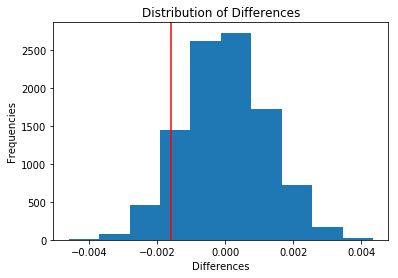

In [32]:
# Plot the differences histogram
plt.hist(diffs)
plt.xlabel('Differences')
plt.ylabel('Frequencies')
plt.title('Distribution of Differences')
plt.axvline(x=obs, color='r')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
# Compute the p-value
p_val = (diffs > obs).mean()
p_val

0.90659999999999996

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

### Conclusions 
- The value calculated here is the $p\_value$.
- This value is important because it helps us decide whether or not to reject the null hypothesis we proposed, meaning that it tells us whether or not $p\_new$ is in fact higher than $p\_old$ or not.
- In this investigation the evidence we found fail to reject the null, where $p\_value$ > $\alpha$

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

convert_old = df2[df2.converted == 1].query("landing_page == 'old_page'").shape[0]
convert_new = df2[df2.converted == 1].query("landing_page == 'new_page'").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]
n_new, n_old, convert_old, convert_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(145310, 145274, 17489, 17264)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [35]:
# Compute the ztest values 
z, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], nobs=[n_new, n_old], value=0, alternative='larger')

In [36]:
print(f'The computed p-value = {p_value}')

The computed p-value = 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- The $z\_score$ simply calculates how far the data point is far from the mean (How many standard deviations ) $z = \frac{X - \mu}{\sigma}$.
- The $p\_value$ is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct.
- Yes, They agree with our findings in the previous parts, there are no evidence to reject the null therefore we fail to reject it .

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

    Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
# Add intercept and dummy variable 
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2.group).drop('control', axis=1)

In [38]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [39]:
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [41]:
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 Nov 2020   Pseudo R-squ.:               8.077e-06
Time:                        10:00:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

- The p-value here is 0.19 
- The hypothesis here is that each variable/attribute equals zero :

    for intercept and ab_page :
$H_0 = 0$
 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding more factors to the model may help capture more information about a person\`s conversion reasons, More factors means a complex model which might not generalize well to the whole population of data.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
# Read the countries dataset
country = pd.read_csv('countries.csv')
country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [43]:
# Join the new dataset with the old and create a test data
df_test = df2.join(country.set_index('user_id'), on='user_id')

In [44]:
# Find the unique values in countries 
df_test.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [45]:
# Add Countries dummy variables 
df_test[['CA', 'UK']] = pd.get_dummies(df_test.country).drop("US", axis=1)

In [46]:
df_test.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0


In [47]:
# Model Fitting 
model = sm.Logit(df_test.converted, df_test[['intercept', 'ab_page', 'CA', 'UK']])
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 07 Nov 2020   Pseudo R-squ.:               2.323e-05
Time:                        10:00:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

#### Seems that combining the country does not have any statistical significance upon the conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
df_test['page_CA'] = df_test.ab_page * df_test.CA
df_test['page_UK'] = df_test.ab_page * df_test.UK

In [49]:
# Model Fitting 
model = sm.Logit(df_test.converted, df_test[['intercept', 'ab_page', 'CA', 'UK', 'page_CA', 'page_UK']])
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 07 Nov 2020   Pseudo R-squ.:               3.482e-05
Time:                        10:00:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
page_CA       -0.0469      0.054     -0.872      0.383      -0.152       0.059
page_UK        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

###### Adding the interaction between the country and the page did not show any statistical siginificance either. 

## Final Thoughts 
This Invetigation led to the following conclusions: 

- First, it is no chance that the conversion rate for the new page is less than the old page with no statitical evidence of the significance of the change to the new page we fail to reject our hypothesis.
- Second, combining new features like the country and adding the interactions with the page did not have any statistical impact on our model. 

Therefore we conclude that, The New Page feature/change is not recommended from what we\`ve so far changing to the new page won\`t add any value to the site. The Old Page seems fine and doing well on the conversion rates.

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0